In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_val_data_dir = r'..\images\train'
img_height = 48
img_width = 48
batch_size = 32

# train DS
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',  # subfolderi - labele
    label_mode='categorical',   # labele - kao one hot encod
    validation_split=0.2, 
    subset = 'training',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
    #interpolation='bilinear' # opciono - metod, kod nas ne radimo resizing
)

train_class_names = train_ds.class_names
print(train_class_names)  

# validation DS (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',
    label_mode='categorical',     
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

val_class_names = val_ds.class_names
print(val_class_names) 


# test DS
test_data_dir = r'..\images\test'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',       
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False  #da se ne mijesa redolsijed podataka
)

test_class_names = test_ds.class_names
print(test_class_names)



Found 28821 files belonging to 7 classes.
Using 23057 files for training.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 28821 files belonging to 7 classes.
Using 5764 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 7066 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Za prebrojavanje slika po kategorijama:

In [17]:
def count_labels(dataset):
    counts = dict.fromkeys(dataset.class_names, 0)
    for _, labels in dataset:
        indices = np.argmax(labels, axis=1)
        for i in indices:
            counts[dataset.class_names[i]] += 1
    return counts

In [18]:
print("Train dataset:", count_labels(train_ds))
print("Validation dataset:", count_labels(val_ds))
print("Test dataset:", count_labels(test_ds))

Train dataset: {'angry': 3229, 'disgust': 341, 'fear': 3294, 'happy': 5765, 'neutral': 3941, 'sad': 3935, 'surprise': 2552}
Validation dataset: {'angry': 764, 'disgust': 95, 'fear': 809, 'happy': 1399, 'neutral': 1041, 'sad': 1003, 'surprise': 653}
Test dataset: {'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}


Prikaz prvih slika po kategorijama iz prvog batch-a: (random)

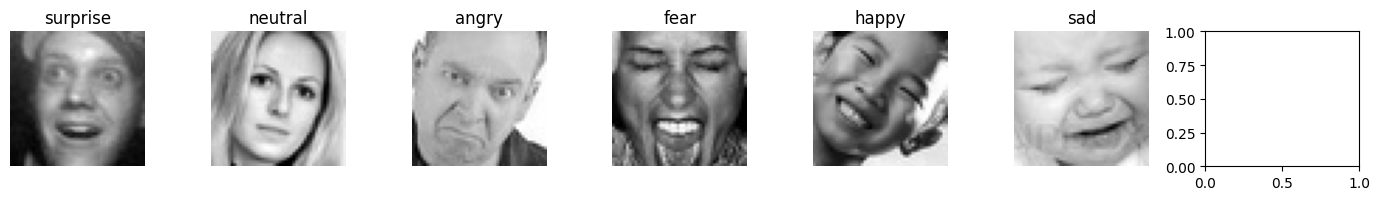

In [ ]:

for images, labels in train_ds.take(1):
    images = images.numpy()
    labels = labels.numpy()
    class_names = train_ds.class_names

    first_of_class = {}  # prva slika po klasi

    for i in range(len(images)):
        class_index = np.argmax(labels[i])
        class_name = class_names[class_index]

        if class_name not in first_of_class:
            first_of_class[class_name] = images[i]

        if len(first_of_class) == len(class_names):
            break

    # broj klasa
    n_classes = len(class_names)
    fig, axes = plt.subplots(1, n_classes, figsize=(n_classes*2, 2))  # 1 red, n_classes kolona

    for ax, (class_name, image) in zip(axes, first_of_class.items()):
        ax.imshow(image.squeeze(), cmap='gray')  # squeeze ako je grayscale
        ax.set_title(class_name)
        ax.axis('off')

    plt.tight_layout()
    plt.show()